### Basic Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import cross_validate

### Importing the data

In [2]:
salesData = pd.read_csv("/Users/sana/Downloads/sales_prediction.csv")
salesData.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Basic EDA

In [3]:
salesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
# Checking for missing values
salesData.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
# Analyzing numerica data first
numericData = salesData.select_dtypes(exclude=['object'])
numericData.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [6]:
numericData.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##### Investigating numeric data

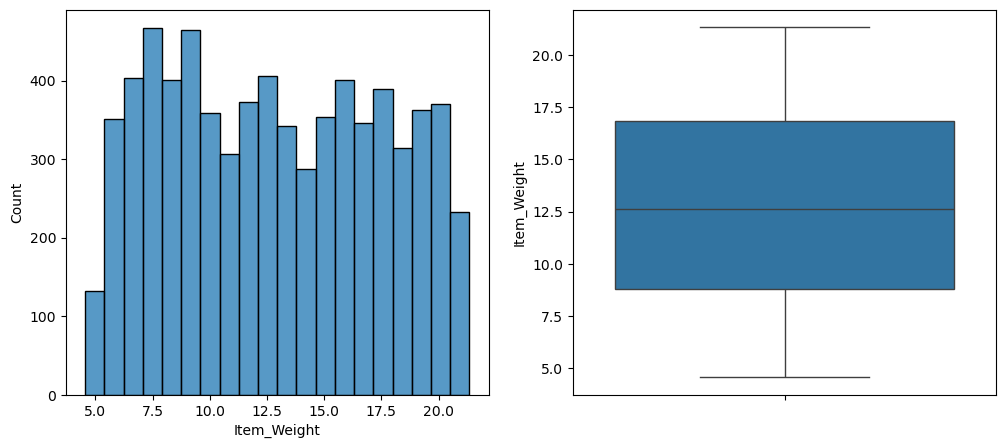

In [7]:
fig, ax = plt.subplots(1, 2, figsize =(12,5))

sns.histplot(data=numericData, x='Item_Weight', ax=ax[0]);
sns.boxplot(data=numericData, y='Item_Weight', ax=ax[1]);

In [8]:
# Creating a function to visualize the data
def visualizeData(dataFrame, colName):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.histplot(data=dataFrame, x=colName, ax=ax[0])
    sns.boxplot(data=dataFrame, x=colName, ax=ax[1])

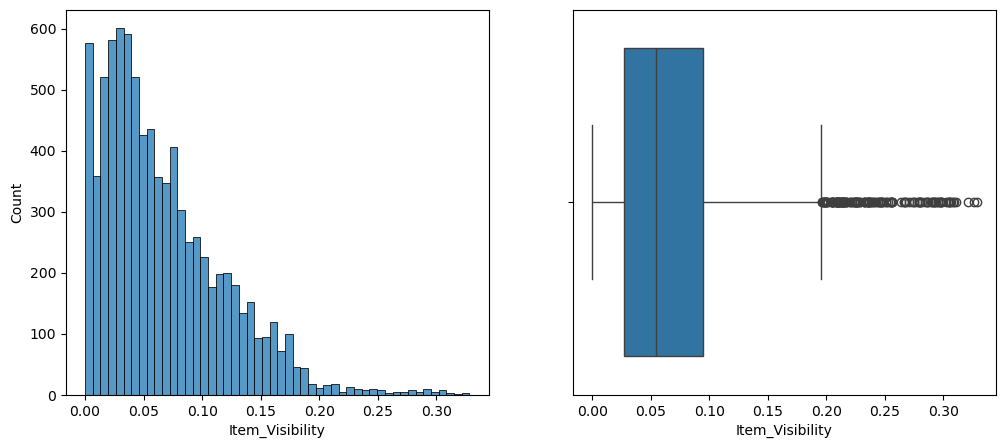

In [9]:
visualizeData(numericData, 'Item_Visibility')

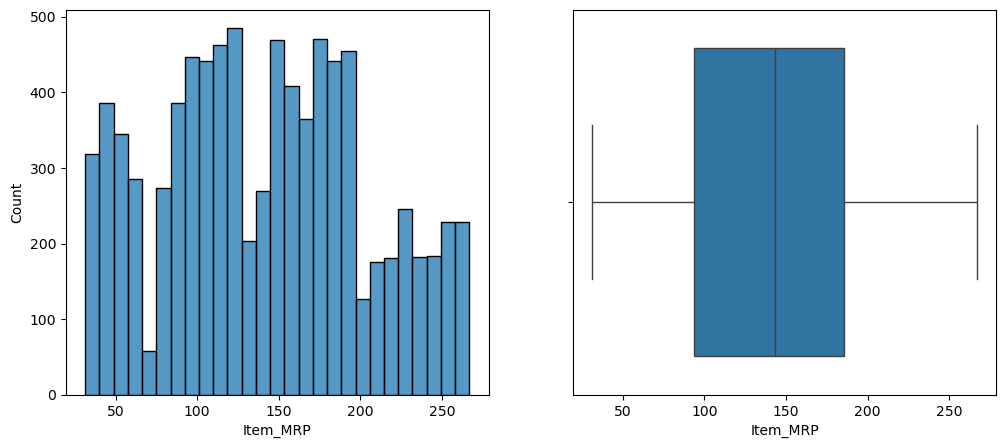

In [10]:
visualizeData(numericData, 'Item_MRP')

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

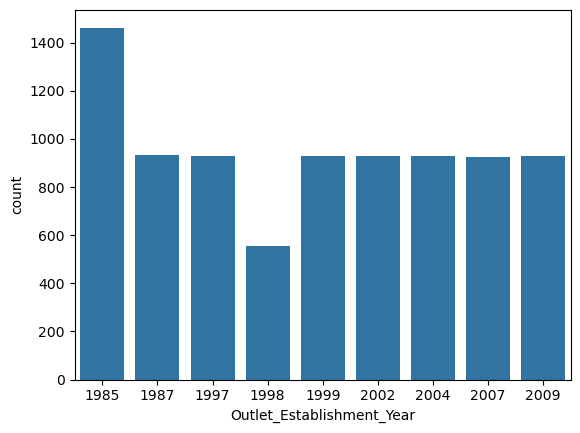

In [11]:
sns.countplot(data=numericData, x = 'Outlet_Establishment_Year')

##### Investigating Categorical Data

In [12]:
categoricalData = salesData.select_dtypes(include=['object'])
categoricalData.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [13]:
categoricalData.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [14]:
categoricalData.isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [15]:
categoricalData['Item_Identifier'].value_counts()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

In [16]:
categoricalData['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [17]:
categoricalData['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

In [18]:
categoricalData['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [19]:
categoricalData['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

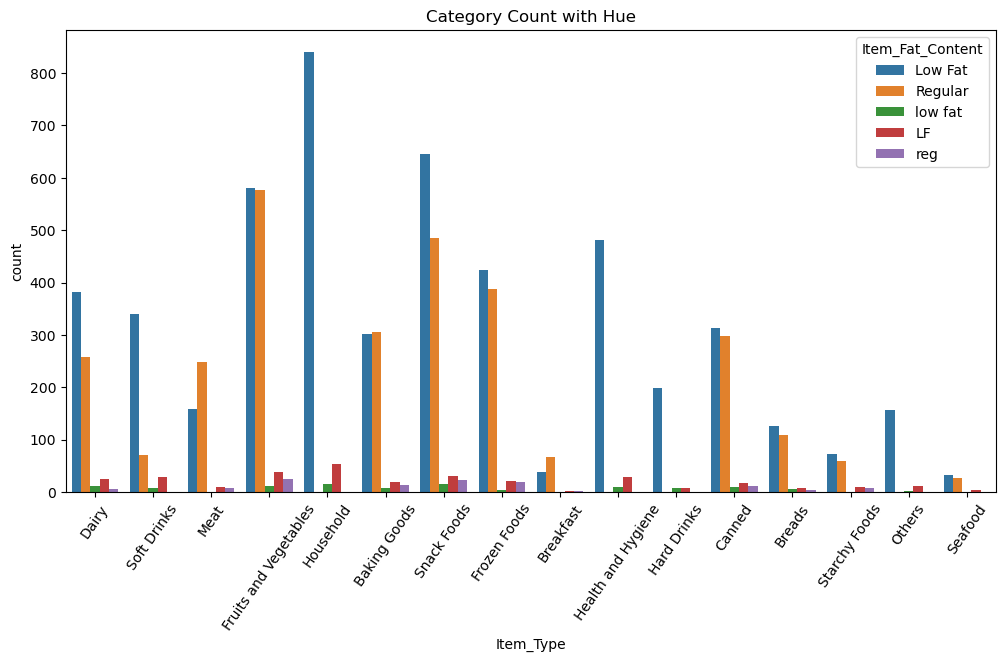

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Item_Type', hue='Item_Fat_Content', data=categoricalData)
plt.xticks(rotation=55)
plt.title('Category Count with Hue')
plt.show()

/var/folders/p9/p69vc0bn30l_8q_tmdsh64_40000gn/T/ipykernel_59667/169195383.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Item_Type', data=categoricalData, palette = 'Set2')


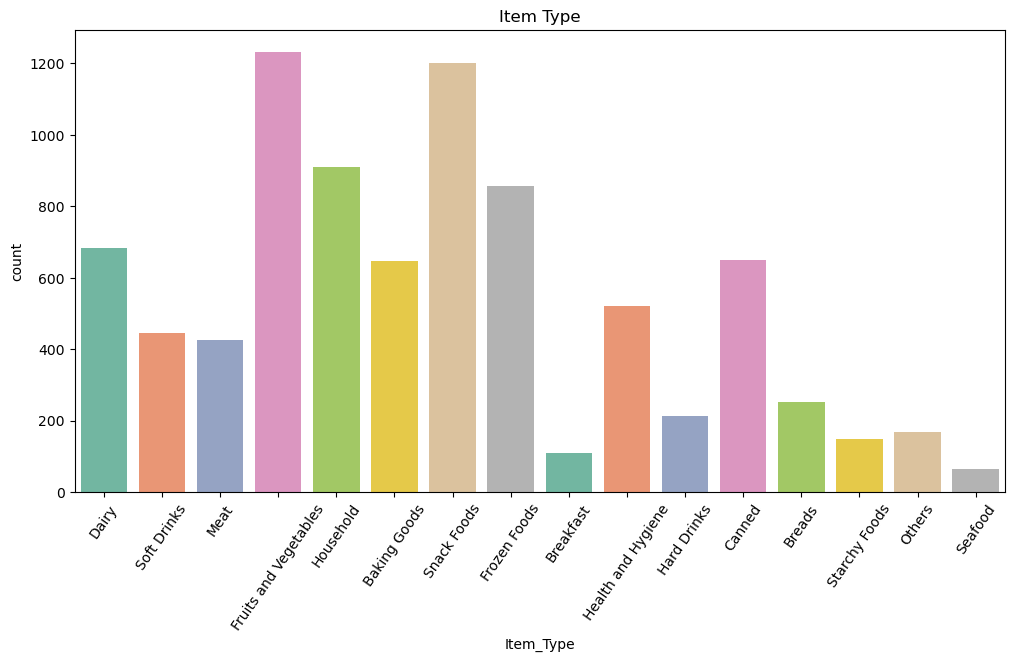

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Item_Type', data=categoricalData, palette = 'Set2')
plt.xticks(rotation=55)
plt.title('Item Type')
plt.show()

/var/folders/p9/p69vc0bn30l_8q_tmdsh64_40000gn/T/ipykernel_59667/2766162557.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outlet_Type', data=categoricalData, palette = 'Set2')


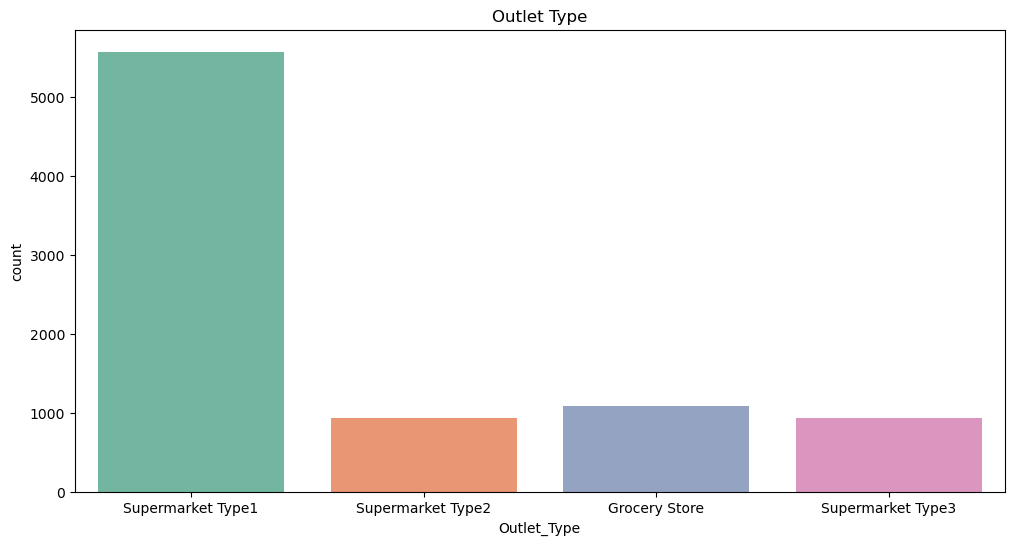

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Outlet_Type', data=categoricalData, palette = 'Set2')
plt.title('Outlet Type')
plt.show()

### Splitting the Data

In [23]:
X = salesData.drop(columns=['Item_Outlet_Sales'])
y = salesData['Item_Outlet_Sales']                            

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((5966, 11), (2557, 11))

In [25]:
X_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Fruits and Vegetables,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Household,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Breads,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.35,Low Fat,0.118342,Snack Foods,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1
3528,FDY16,18.35,Regular,0.092150,Frozen Foods,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1


### Data Wrangling + Feature Engineering (Training Data)

In [26]:
# Mapping Item IDs to Item Types
def createItemType(dataFrame):
    dataFrame['Item_Type'] = dataFrame['Item_Identifier'].str[:2]
    dataFrame['Item_Type'] = dataFrame['Item_Type'].map({
    'FD': 'Food',
    'NC': 'Non Consumables',
    'DR': 'Drink'})
    return dataFrame

In [27]:
X_train = createItemType(X_train)
X_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Food,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Non Consumables,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Food,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.35,Low Fat,0.118342,Food,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1
3528,FDY16,18.35,Regular,0.092150,Food,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1


In [28]:
# Handling missing values
X_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [29]:
X_train[['Item_Identifier', 'Item_Weight']].drop_duplicates().sort_values(by =
['Item_Identifier'])

,Item_Identifier,Item_Weight
1245,DRA12,11.60
4900,DRA24,19.35
6057,DRA59,NaN
1876,DRA59,8.27
3733,DRB01,NaN
...,...,...
411,NCZ42,10.50
2084,NCZ53,NaN
6879,NCZ53,9.60
7926,NCZ54,14.65


In [30]:
X_train[['Item_Type', 'Item_Weight']].drop_duplicates().sort_values(by =
['Item_Type'])

,Item_Type,Item_Weight
2796,Drink,5.730
998,Drink,20.250
670,Drink,8.395
6091,Drink,13.500
3438,Drink,13.850
...,...,...
6624,Non Consumables,12.600
6191,Non Consumables,8.880
1911,Non Consumables,19.850
135,Non Consumables,7.235


#### Filling missing numeric data

In [31]:
# Using the mapping to fill in missing values for weight
itemID_weight_pivot = X_train.pivot_table(values='Item_Weight', 
                                             index = 'Item_Identifier').reset_index()
itemID_weight_mapping = dict(zip(itemID_weight_pivot['Item_Identifier'], 
                                 itemID_weight_pivot['Item_Weight']))
list(itemID_weight_mapping.items())[:10]


[('DRA12', 11.6),
 ('DRA24', 19.35),
 ('DRA59', 8.27),
 ('DRB01', 7.39),
 ('DRB13', 6.115),
 ('DRB24', 8.785),
 ('DRB25', 12.300000000000002),
 ('DRB48', 16.75),
 ('DRC01', 5.92),
 ('DRC12', 17.85)]

In [32]:
# If, for some reason, there is an unknown Item ID, the average weight is used
item_type_weight_pivot = X_train.pivot_table(values='Item_Weight', 
                                             index = 'Item_Type', aggfunc='median').reset_index()
item_type_weight_mapping = dict(zip(item_type_weight_pivot['Item_Type'], 
                                 item_type_weight_pivot['Item_Weight']))
item_type_weight_mapping.items()

dict_items([('Drink', 11.8), ('Food', 12.8), ('Non Consumables', 13.05)])

In [33]:
def imputeWeight(dataFrame):
    dataFrame.loc[:, 'Item_Weight'] = dataFrame.loc[:, 'Item_Weight'].fillna(dataFrame.loc[:, 'Item_Identifier'].map(itemID_weight_mapping))
    dataFrame.loc[:, 'Item_Weight'] = dataFrame.loc[:, 'Item_Weight'].fillna(dataFrame.loc[:, 'Item_Type'].map(item_type_weight_mapping))
    return dataFrame

In [34]:
# Fill in missing data
X_train = imputeWeight(X_train)

In [35]:
X_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

#### Filling missing categorical data

In [36]:
X_train.groupby(by=['Outlet_Type', 'Outlet_Size']).size()

Outlet_Type        Outlet_Size
Grocery Store      Small           355
Supermarket Type1  High            649
                   Medium          631
                   Small          1312
Supermarket Type2  Medium          661
Supermarket Type3  Medium          668
dtype: int64

In [37]:
outlet_type_size_pivot = X_train.pivot_table(values='Outlet_Size', index='Outlet_Type',
                                             aggfunc=(lambda x: x.mode()[0])).reset_index()
outlet_type_size_mapping = dict(zip(outlet_type_size_pivot['Outlet_Type'], 
                                    outlet_type_size_pivot['Outlet_Size']))
outlet_type_size_mapping.items()

dict_items([('Grocery Store', 'Small'), ('Supermarket Type1', 'Small'), ('Supermarket Type2', 'Medium'), ('Supermarket Type3', 'Medium')])

In [38]:
def imputeOutlet(dataFrame):
    dataFrame.loc[:, 'Outlet_Size'] = dataFrame.loc[:, 'Outlet_Size'].fillna(dataFrame.loc[:, 'Outlet_Type'].map(outlet_type_size_mapping))
    return dataFrame

In [39]:
X_train = imputeOutlet(X_train)

In [40]:
X_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [41]:
# Standardize fat content categories
def standardizeItemFat(dataFrame):
    dataFrame['Item_Fat_Content'] = dataFrame['Item_Fat_Content'].replace({
    'Low Fat': 'Low_Fat',
    'LF': 'Low_Fat',
    'reg': 'Regular',
    'low fat': 'Low_Fat'
})
    return dataFrame

In [42]:
X_train = standardizeItemFat(X_train)
X_train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low_Fat    3860
Regular    2106
Name: count, dtype: int64

In [43]:
X_train.groupby(by=['Item_Type', 'Item_Fat_Content']).size()

Item_Type        Item_Fat_Content
Drink            Low_Fat              517
                 Regular               43
Food             Low_Fat             2206
                 Regular             2063
Non Consumables  Low_Fat             1137
dtype: int64

In [44]:
# Correcting non-consumables
def correctFatContent(dataFrame):
    dataFrame.loc[dataFrame['Item_Type'] == 'Non Consumables', 'Item_Fat_Content'] = 'Non_Edible'
    return dataFrame

In [45]:
X_train = correctFatContent(X_train)

In [46]:
X_train.groupby(by=['Item_Type', 'Item_Fat_Content']).size()

Item_Type        Item_Fat_Content
Drink            Low_Fat              517
                 Regular               43
Food             Low_Fat             2206
                 Regular             2063
Non Consumables  Non_Edible          1137
dtype: int64

In [47]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                5966 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                5966 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


## Preparing Testing Data for ML

In [48]:
X_test = createItemType(X_test)
X_test = imputeWeight(X_test)
X_test = imputeOutlet(X_test)
X_test = standardizeItemFat(X_test)
X_test = correctFatContent(X_test)

In [49]:
X_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

#### One hot encoding columns

In [50]:
catFeatures = X_train.select_dtypes(include=['object'])
catFeatures.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Food,OUT010,Small,Tier 3,Grocery Store
655,NCJ42,Non_Edible,Non Consumables,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Food,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low_Fat,Food,OUT045,Small,Tier 2,Supermarket Type1
3528,FDY16,Regular,Food,OUT013,High,Tier 3,Supermarket Type1


In [51]:
encoder = OneHotEncoder(handle_unknown = 'ignore', 
                        sparse_output = False).set_output(transform = 'pandas')

In [52]:
ohe = encoder.fit_transform(X_train[['Item_Identifier', 'Item_Fat_Content',
                                     'Item_Type', 'Outlet_Identifier', 
                                     'Outlet_Size', 'Outlet_Location_Type', 
                                     'Outlet_Type']])
ohe.head()

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
1921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [53]:
X_train = pd.concat([X_train, ohe], axis=1).drop(columns = ['Item_Identifier', 'Item_Fat_Content',
                                     'Item_Type', 'Outlet_Identifier', 
                                     'Outlet_Size', 'Outlet_Location_Type', 
                                     'Outlet_Type'])
X_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
1921,7.72,0.147904,116.6466,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
655,19.75,0.014301,103.0332,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2229,8.60,0.054221,129.1310,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2537,19.35,0.118342,222.6088,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3528,18.35,0.092150,184.8266,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [54]:
# One hot encoding test data
oheTest = encoder.transform(X_test[['Item_Identifier', 'Item_Fat_Content',
                                     'Item_Type', 'Outlet_Identifier', 
                                     'Outlet_Size', 'Outlet_Location_Type', 
                                     'Outlet_Type']])
oheTest.head()

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [55]:
X_test = pd.concat([X_test, oheTest], axis=1).drop(columns = ['Item_Identifier', 'Item_Fat_Content',
                                     'Item_Type', 'Outlet_Identifier', 
                                     'Outlet_Size', 'Outlet_Location_Type', 
                                     'Outlet_Type'])
X_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7503,14.300,0.026300,79.4302,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2957,7.930,0.071136,42.7086,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7031,14.500,0.041313,42.0454,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1084,13.000,0.044767,173.7054,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
856,10.195,0.012456,197.5110,2004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Modeling

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

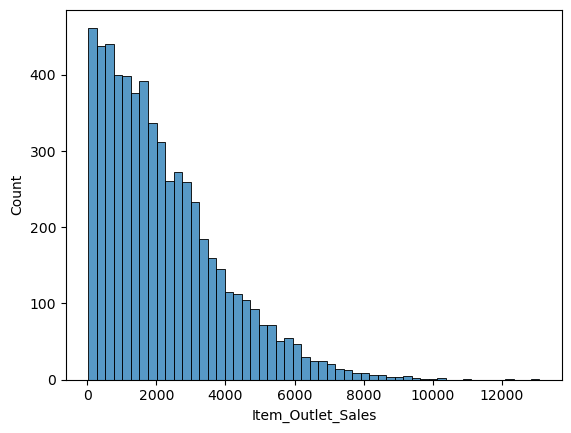

In [56]:
sns.histplot(y_train)

In [74]:
rf = RandomForestRegressor(random_state = 42)

In [78]:
from xgboost import XGBRegressor
xgb = XGBRegressor(objective = 'reg:squarederror', random_state = 42)

In [63]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate R² score
    r2 = r2_score(y_test, y_pred)
    print('R² score on test set: ', r2)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print('RMSE on test set: ', rmse)

In [76]:
evaluate_model(model = rf, X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test)

R² score on test set:  0.5543267996345487
RMSE on test set:  1117.285885323038


In [79]:
evaluate_model(model = xgb, X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test)

R² score on test set:  0.5701327508635561
RMSE on test set:  1097.2945741485482
